#  Movie profits

### Data source: 
Requested data from <a href=https://www.the-numbers.com/>The Numbers</a> (of OpusData) and <a href='https://www.usinflationcalculator.com'>Inflation Calcuation</a>

## Module Imports and custom functions


In [1]:
import seaborn as sns
%matplotlib inline
from data_preprocess import *
from sns_fig_funcs import *


<p> </p>

### Load, Clean, and Adjust for Inflation
 

In [2]:
movie_data = load_clean_data()
movie_data = movie_data.sort_values(by=['profit'], ascending=False)
display(movie_data.head())
display(movie_data.describe())

,title,year,budget,rating,creative,source,genre,time,profit,sequel
695,Avatar,2009,425000000,PG-13,Science Fiction,Original Screenplay,Action,162.0,2821.614335,0.0
1641,Star Wars Ep. VII: The Force Awakens,2015,306000000,PG-13,Science Fiction,Original Screenplay,Adventure,136.0,1897.579985,1.0
1895,Avengers: Infinity War,2017,300000000,PG-13,Super Hero,Based on Comic/Graphic Novel,Action,156.0,1836.237566,1.0
1475,Jurassic World,2014,215000000,PG-13,Science Fiction,Based on Fiction Book/Short Story,Action,124.0,1558.600237,1.0
1108,The Avengers,2011,225000000,PG-13,Super Hero,Based on Comic/Graphic Novel,Action,143.0,1479.118666,0.0


,year,budget,time,profit,sequel
count,1936.000000,1.936000e+03,1822.000000,1936.000000,1934.000000
mean,2011.261880,5.342857e+07,109.396817,120.098410,0.152534
std,3.457548,5.368562e+07,19.644955,223.861766,0.359630
min,2006.000000,1.000000e+07,0.000000,-130.331286,0.000000
25%,2008.000000,1.900000e+07,97.000000,-0.630957,0.000000
50%,2011.000000,3.275000e+07,108.000000,41.586805,0.000000
75%,2014.000000,6.500000e+07,120.000000,139.888907,0.000000
max,2018.000000,4.250000e+08,201.000000,2821.614335,1.000000



## Profit scatter plot

In [125]:
def data_scatter(data):
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.set_facecolor('#0066CC')
    sns.scatterplot(x='budget', y='profit',
                     hue='genre', size='profit',
                     sizes=(100, 400),
                     data=data.loc[data['profit'] > 250], ax=ax)

    ax.set_xlabel('Budget in $ millions')
    ax.set_ylabel('Profit in $ millions')
    sns.despine()
    ax.legend(loc='right', bbox_to_anchor=(1.4, 0.5), borderaxespad=0)
    fig.savefig('figs/budget_vs_profit-scatter.png', bbox_inches='tight', dpi=150)
                 
                 

In [126]:
movie_data[movie_data.budget==movie_data.budget.max()]

,title,year,budget,rating,creative,source,genre,time,profit,sequel
695,Avatar,2009,425000000,PG-13,Science Fiction,Original Screenplay,Action,162.0,2821.614335,0.0


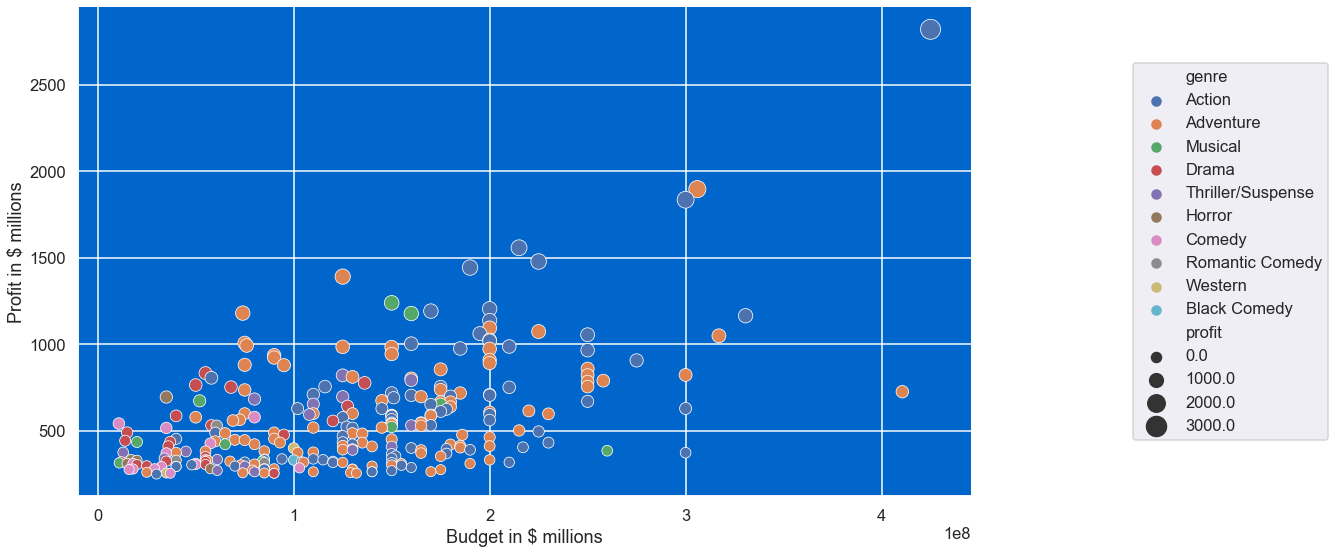

In [127]:
data_scatter(movie_data)

## Top 5 ways to make the most profits at box office

In [ ]:
data_bar_graph(movie_data,'genre')

In [ ]:
data_bar_graph(movie_data,'rating')

In [ ]:
data_bar_graph(movie_data,'creative')

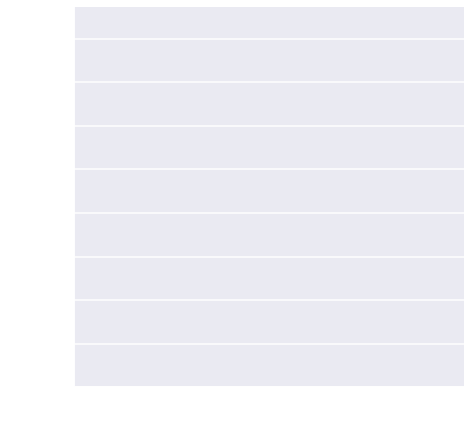

In [128]:
data_bar_graph(movie_data,'time')

In [ ]:
movie_data.source = movie_data.source.apply(lambda x: x.replace('Based on','') if isinstance(x,str) else x)
data_bar_graph(movie_data,'source')

Do we really want to sit in the movie that long?

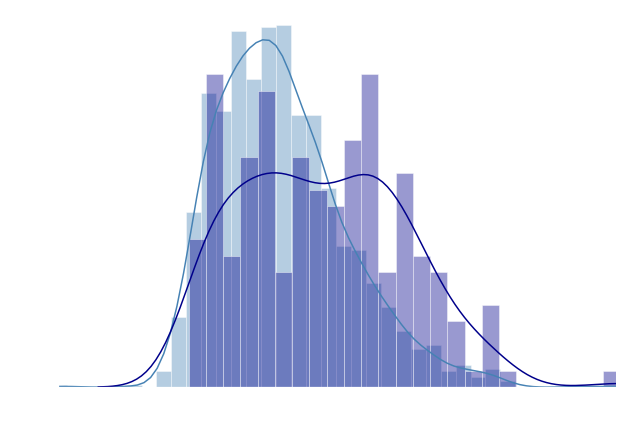

In [139]:
c = 'w'
fig, ax = plt.subplots(figsize=(10,7))
sns.set(style='white')
ax = sns.distplot(movie_data.time.dropna(), bins=50, color='steelblue')
sns.distplot(movie_data.iloc[0:int(movie_data.shape[0]*0.1)]['time'], bins=25, color='darkblue', ax=ax)
ax.set(xlim=(50,200),xlabel='Time (minutes)', ylabel='Ratio of movies')
sns.despine()
ax.set_xlabel('Time (minutes)', color=c) 
ax.set_ylabel('Ratio of movies', color=c)
ax.tick_params(axis='both', colors=c, labelcolor=c)
ax.spines['left'].set_color(c)
ax.spines['bottom'].set_color(c)
fig.savefig('figs/runtime-distribution.png', transparent=True, bbox_inches='tight', dpi=150)

In [ ]:
cols = ['genre', 'rating', 'creative', 'source']
col = cols[0]
avg_ = movie_data.groupby(col).agg('mean').reset_index().sort_values('profit', ascending=False)
data_line_graph(avg_, col)

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.lineplot(x='year', y='profit', hue=col, ci=None, data=movie_data, color='steelblue')
ax.set(xlabel='Year', ylabel='Profit ($ millions)', title='{}'.format(col.title()))
